# <center> Avocado Project

### Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

    •	Date - The date of the observation
    •	AveragePrice - the average price of a single avocado
    •	type - conventional or organic
    •	year - the year
    •	Region - the city or region of the observation
    •	Total Volume - Total number of avocados sold
    •	4046 - Total number of avocados with PLU 4046 sold
    •	4225 - Total number of avocados with PLU 4225 sold
    •	4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 

Dataset Link-
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip


### Retriving Dataset

In [1]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('avocado.csv')

### 1: Performed EDA (with proper visualization)

In [2]:
# Display the first few rows of the DataFrame
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df['type'].unique()

array(['conventional'], dtype=object)

In [4]:
# drop the type column
df = df.drop(['type','region','Date'], axis=1)
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year'],
      dtype='object')

In [5]:
# Dimension of dataset
df.shape

(1517, 10)

In [6]:
# Summary of the dataset:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1517 non-null   float64
 1   Total Volume  1517 non-null   float64
 2   4046          1517 non-null   float64
 3   4225          1517 non-null   float64
 4   4770          1517 non-null   float64
 5   Total Bags    1517 non-null   float64
 6   Small Bags    1517 non-null   float64
 7   Large Bags    1517 non-null   float64
 8   XLarge Bags   1517 non-null   float64
 9   year          1517 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 118.6 KB
None


In [7]:
# Missing values in the dataset:
print(df.isnull().sum())

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
year            0
dtype: int64


In [8]:
# Summary of the dataset
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

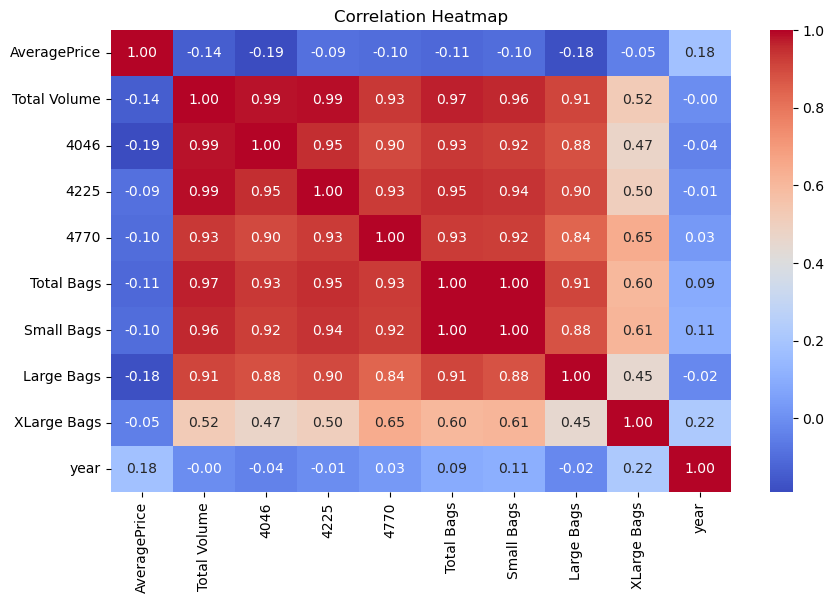

In [10]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

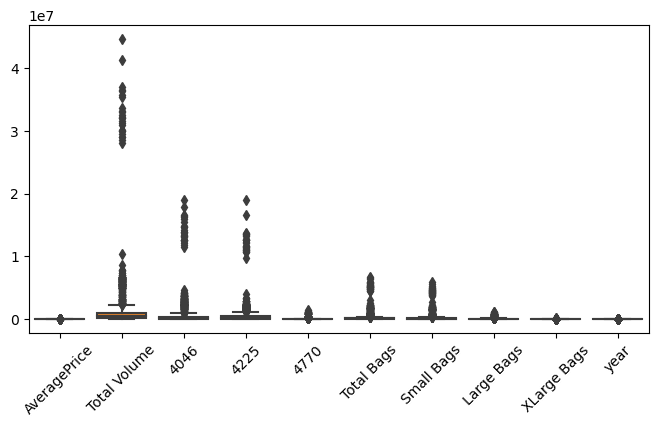

In [11]:
# Boxplot for each feature
plt.figure(figsize=(8, 4))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

### 2: Check outliers if present remove it

In [12]:
# Check outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove outliers
df_no_outliers = df[~outliers]

# Print summary after removing outliers
print("Summary after removing outliers:")
print(df_no_outliers.describe())

Summary after removing outliers:
       AveragePrice  Total Volume           4046          4225          4770  \
count    881.000000  8.810000e+02     881.000000  8.810000e+02    881.000000   
mean       1.088002  3.871391e+05  149892.549977  1.598372e+05   8614.136515   
std        0.159367  3.357517e+05  194926.549195  1.940820e+05  12326.076101   
min        0.670000  3.875074e+04     509.940000  4.856270e+03      7.480000   
25%        0.990000  1.212365e+05   15004.700000  3.448333e+04    368.950000   
50%        1.100000  2.742092e+05   66513.950000  6.949308e+04   3203.530000   
75%        1.200000  5.366430e+05  194526.220000  2.114536e+05  13077.850000   
max        1.450000  1.619341e+06  871511.120000  1.107466e+06  69371.340000   

          Total Bags     Small Bags    Large Bags  XLarge Bags    year  
count     881.000000     881.000000    881.000000   881.000000   881.0  
mean    68795.164926   58404.857117  10329.380397    60.927412  2015.0  
std     56467.101944   5170

### 3: Check multicollinearity if present rewove it

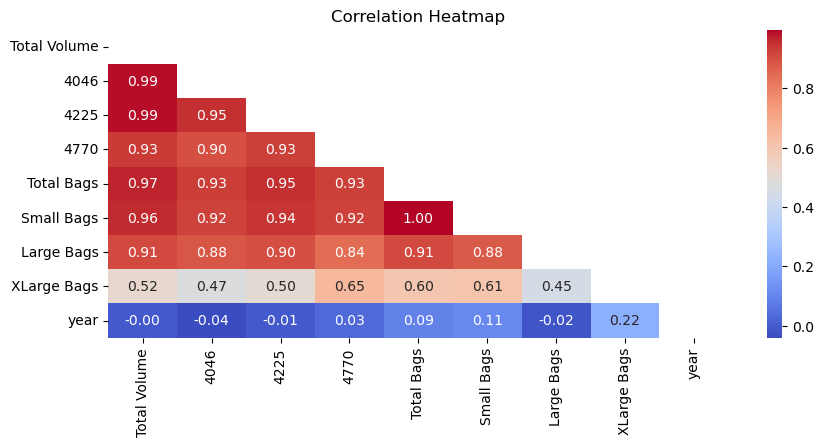

{'Large Bags', 'Total Bags', '4046', '4770', '4225', 'Small Bags'}
Summary after removing multicollinearity:
       AveragePrice  Total Volume    XLarge Bags         year
count   1517.000000  1.517000e+03    1517.000000  1517.000000
mean       1.074990  1.601879e+06    2181.771074  2015.162821
std        0.188891  4.433143e+06    7455.712144     0.369324
min        0.490000  3.875074e+04       0.000000  2015.000000
25%        0.980000  1.474700e+05       0.000000  2015.000000
50%        1.080000  4.027919e+05       0.000000  2015.000000
75%        1.190000  9.819751e+05     401.480000  2015.000000
max        1.680000  4.465546e+07  108072.790000  2016.000000


In [13]:
import numpy as np

# # Calculate the correlation matrix
correlation_matrix = df.drop('AveragePrice', axis=1).corr()

# # Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Find features with high correlation
high_corr_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)
print(high_corr_features)

# Remove highly correlated features
df_no_multicollinearity = df.drop(high_corr_features, axis=1)

# Print summary after removing multicollinearity
print("Summary after removing multicollinearity:")
print(df_no_multicollinearity.describe())


### 4: Check Skewness, remove 

In [14]:
# Check skewness for each feature
skewness = df.drop('AveragePrice', axis=1).skew()

# Remove features with high skewness
high_skewness_features = skewness[abs(skewness) > 1].index
df_no_skewness = df.drop(high_skewness_features, axis=1)

print(high_skewness_features)

Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'year'],
      dtype='object')


### 5: Use Standard Scaling

In [15]:
# Preprocessing (if needed)
# Example: scaling numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('AveragePrice', axis=1))
df_scaled = pd.DataFrame(df_scaled)
df_scaled.head()

,0,1,2,3,4,5,6,7,8
0,-0.346966,-0.331490,-0.333053,-0.365608,-0.375994,-0.371055,-0.360044,-0.292727,-0.441008
1,-0.349078,-0.331676,-0.338923,-0.365534,-0.374927,-0.369812,-0.360008,-0.292727,-0.441008
2,-0.334785,-0.331614,-0.300348,-0.365010,-0.376722,-0.371922,-0.359960,-0.292727,-0.441008
3,-0.343636,-0.331441,-0.322576,-0.365431,-0.379802,-0.375576,-0.359701,-0.292727,-0.441008
4,-0.349944,-0.331539,-0.339401,-0.365408,-0.379310,-0.375098,-0.359160,-0.292727,-0.441008


### 6. Check VIF

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF for each feature
X = df.drop('AveragePrice', axis=1)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Display the VIF values
print("Variance Inflation Factor (VIF):")
print(vif_data)

Variance Inflation Factor (VIF):
        Feature       VIF
0  Total Volume       inf
1          4046       inf
2          4225       inf
3          4770       inf
4    Total Bags       inf
5    Small Bags       inf
6    Large Bags       inf
7   XLarge Bags       inf
8          year  1.164126


C:\Users\AADERSHI MOHAN\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


### 7: Apply feature scalling method on numerical feature

In [19]:
from sklearn.preprocessing import StandardScaler

# Separate numerical features
numerical_features = df.drop('AveragePrice', axis=1)

# Apply Standardization to numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Create a DataFrame with scaled features
df_scaled = pd.DataFrame(scaled_features, columns=numerical_features.columns)

df_scaled['AveragePrice'] = df['AveragePrice']

# Print the first few rows of the scaled DataFrame
print("Scaled DataFrame:")
print(df_scaled.head())

Scaled DataFrame:
   Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     -0.346966 -0.331490 -0.333053 -0.365608   -0.375994   -0.371055   
1     -0.349078 -0.331676 -0.338923 -0.365534   -0.374927   -0.369812   
2     -0.334785 -0.331614 -0.300348 -0.365010   -0.376722   -0.371922   
3     -0.343636 -0.331441 -0.322576 -0.365431   -0.379802   -0.375576   
4     -0.349944 -0.331539 -0.339401 -0.365408   -0.379310   -0.375098   

   Large Bags  XLarge Bags      year  AveragePrice  
0   -0.360044    -0.292727 -0.441008          1.33  
1   -0.360008    -0.292727 -0.441008          1.35  
2   -0.359960    -0.292727 -0.441008          0.93  
3   -0.359701    -0.292727 -0.441008          1.08  
4   -0.359160    -0.292727 -0.441008          1.28  


### 8: Resampling to balance the class(if problem is classification)

In [20]:
# It's not a classification problem

### 9: Apply feature selection method

In [24]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Assuming X contains features and y contains the target variable for regression
X = df.drop('AveragePrice', axis=1)
y = df['AveragePrice']

# Initialize the estimator (e.g., RandomForestRegressor for regression)
estimator = RandomForestRegressor(random_state=42)

# Initialize Recursive Feature Elimination (RFE) with the estimator
rfe = RFE(estimator, n_features_to_select=5, step=1)

# Fit RFE to the data
rfe.fit(X, y)

# Get selected feature indices
selected_features_indices = rfe.get_support(indices=True)

# Get selected feature names
selected_features = X.columns[selected_features_indices]

# Print selected feature names
print("Selected features:")
print(selected_features)


Selected features:
Index(['Total Volume', '4046', '4225', '4770', 'Small Bags'], dtype='object')


### 10: Split the data into feature and target variable x and y

In [25]:
# Split the data into feature variables (X) and target variable (y)

X = df.drop('AveragePrice', axis=1)
y = df['AveragePrice']

# Display the first few rows of X and y
print("Feature variables (X):")
print(X.head())
print("\nTarget variable (y):")
print(y.head())

Feature variables (X):
   Total Volume     4046       4225    4770  Total Bags  Small Bags  \
0      64236.62  1036.74   54454.85   48.16     8696.87     8603.62   
1      54876.98   674.28   44638.81   58.33     9505.56     9408.07   
2     118220.22   794.70  109149.67  130.50     8145.35     8042.21   
3      78992.15  1132.00   71976.41   72.58     5811.16     5677.40   
4      51039.60   941.48   43838.39   75.78     6183.95     5986.26   

   Large Bags  XLarge Bags  year  
0       93.25          0.0  2015  
1       97.49          0.0  2015  
2      103.14          0.0  2015  
3      133.76          0.0  2015  
4      197.69          0.0  2015  

Target variable (y):
0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64


### 11: Divide data into 4 part,  X_train, y_train, x_test, y_test by using train test split method

In [26]:
from sklearn.model_selection import train_test_split

# Divide the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1137, 9)
y_train shape: (1137,)
X_test shape: (380, 9)
y_test shape: (380,)


### 12: Building models and checking cross validation score

In [27]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Split the data into features (X) and target variable (y)
X = df.drop('AveragePrice', axis=1)  # Features
y = df['AveragePrice']               # Target variable

# Choose models to train
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42)
}

# Evaluate models using cross-validation
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_squared_error')  # Using negative mean squared error for scoring
    print(f"Cross-validation scores for {name}: {cv_scores}")
    print(f"Mean cross-validation score for {name}: {cv_scores.mean()}\n")


Cross-validation scores for Linear Regression: [-0.01879202 -0.0300238  -0.16949925]
Mean cross-validation score for Linear Regression: -0.0727716931420754

Cross-validation scores for Random Forest Regressor: [-0.01488619 -0.02170641 -0.03638261]
Mean cross-validation score for Random Forest Regressor: -0.024325072222243966



### 13. Find Best Model

In [28]:
import warnings 
warnings.filterwarnings('ignore')

In [29]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Split the data into features (X) and target variable (y)
X = df.drop('AveragePrice', axis=1)  # Features
y = df['AveragePrice']               # Target variable

# Choose models to train
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42)
}

# Evaluate models using cross-validation and MSE
mse_scores = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_squared_error')  # Using negative mean squared error for scoring
    mse_scores[name] = -cv_scores.mean()  # Convert negative MSE to positive
    print(f"Mean squared error for {name}: {-cv_scores.mean()}")

# Find the best model
best_model = min(mse_scores, key=mse_scores.get)
print(f"\nThe best model for predicting 'W' is: {best_model} with MSE: {mse_scores[best_model]}")


Mean squared error for Linear Regression: 0.0727716931420754
Mean squared error for Random Forest Regressor: 0.024325072222243966

The best model for predicting 'W' is: Random Forest Regressor with MSE: 0.024325072222243966


### 14: Hyper parameters tunning

In [30]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Split the data into features (X) and target variable (y)
X = df.drop('AveragePrice', axis=1)  # Features
y = df['AveragePrice']               # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define hyperparameters grid for Linear Regression
linear_params = {}

# Define hyperparameters grid for Random Forest Regression
rf_params = {
    'n_estimators': [50, 100]
}

# Initialize GridSearchCV for Linear Regression
linear_grid_search = GridSearchCV(LinearRegression(), param_grid=linear_params, cv=3, scoring='neg_mean_squared_error')

# Initialize GridSearchCV for Random Forest Regression
rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=rf_params, cv=5, scoring='neg_mean_squared_error')

# Perform GridSearchCV for Linear Regression
linear_grid_search.fit(X_train, y_train)

# Perform GridSearchCV for Random Forest Regression
rf_grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best models
best_linear_model = linear_grid_search.best_estimator_
best_rf_model = rf_grid_search.best_estimator_

# Evaluate the best models on the test set
linear_test_score = best_linear_model.score(X_test, y_test)
rf_test_score = best_rf_model.score(X_test, y_test)

print("Best Linear Regression Model:", best_linear_model)
print("Linear Regression Test Score:", linear_test_score)
print("\nBest Random Forest Regression Model:", best_rf_model)
print("Random Forest Regression Test Score:", rf_test_score)


Best Linear Regression Model: LinearRegression()
Linear Regression Test Score: 0.14627443968626075

Best Random Forest Regression Model: RandomForestRegressor(random_state=42)
Random Forest Regression Test Score: 0.8063080769888643


### 15: Save the model by using joblib method

In [31]:
import joblib

# Save the best Random Forest Regression model
joblib.dump(best_rf_model, 'best_rf_model.pkl')

['best_rf_model.pkl']

### 16: Load the data by using joblib method

In [32]:
import joblib

# Load the trained model
loaded_model = joblib.load('best_rf_model.pkl')
print('Loaded Model', loaded_model)

Loaded Model RandomForestRegressor(random_state=42)


### 17: Use the test dataset file to predict the target variable

In [37]:
import pandas as pd
import joblib

# Load the test dataset
test_df = df.copy()

# Assuming the test dataset has the same features as the training dataset (except the target variable)
X_test = test_df.drop('AveragePrice', axis=1)  # Features

# Load the trained model
loaded_model = joblib.load('best_rf_model.pkl')

# Use the loaded model to make predictions on the test dataset
predictions = loaded_model.predict(X_test)

# Print the predictions
print("Predictions for the test dataset:")
print(predictions)


Predictions for the test dataset:
[1.3103 1.335  1.0004 ... 1.4236 1.4143 1.4165]
